In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import heartpy as hp
from pre_processing import filter_signal, pre_process, check_R

In [4]:
df_X_train = pd.read_csv("data/X_train.csv", index_col="id")
df_Y_train = pd.read_csv("data/Y_train.csv", index_col="id")

In [10]:
id = 1 #4465 #4241 #126 #5085
signal = df_X_train.iloc[id,:].dropna()
freq = 300.0 #Hz
filter_bandwidth =[3, 45]

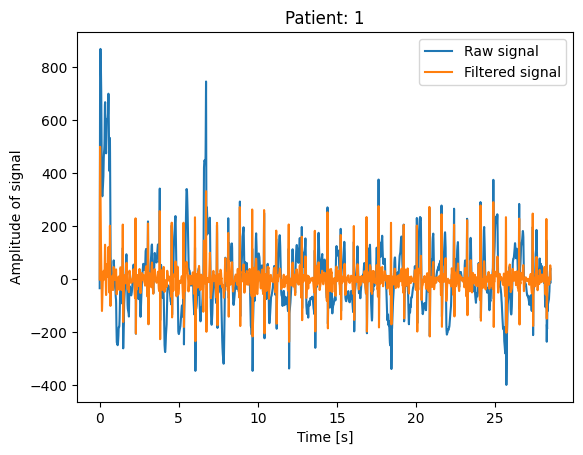

In [11]:
sig_flt= filter_signal(signal=signal,
                          bandwidth=filter_bandwidth,
                          freq=freq)

plt.plot(np.arange(len(signal))/freq, signal, label = "Raw signal")
plt.plot(np.arange(len(sig_flt))/freq, sig_flt, label = "Filtered signal")
plt.title(f'Patient: {id}')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude of signal')
plt.legend()
plt.show()

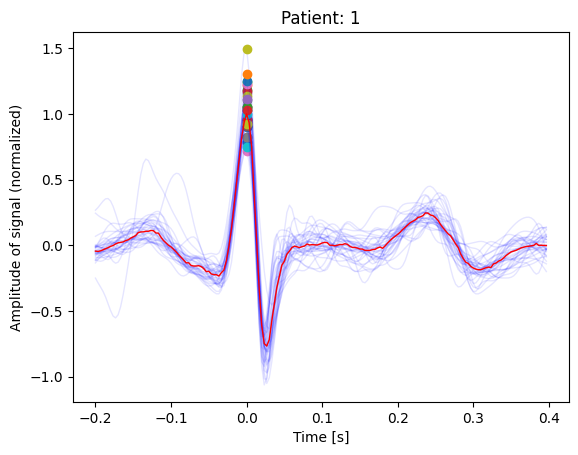

In [12]:
ts, signal, signal_flt, rpeaks, templates_ts, templates = pre_process(signal=signal, freq=freq)

r_id = int(-templates_ts[0]*freq)

for i in range(len(templates)):
    plt.plot(templates_ts, templates[i], 'b', alpha=0.1, lw=1)
    plt.plot(0, templates[i,r_id], 'o')
plt.plot(templates_ts, np.median(templates, axis=0), 'r', alpha=1, lw=1)

plt.title(f'Patient: {id}')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude of signal (normalized)')
plt.show()

{0}


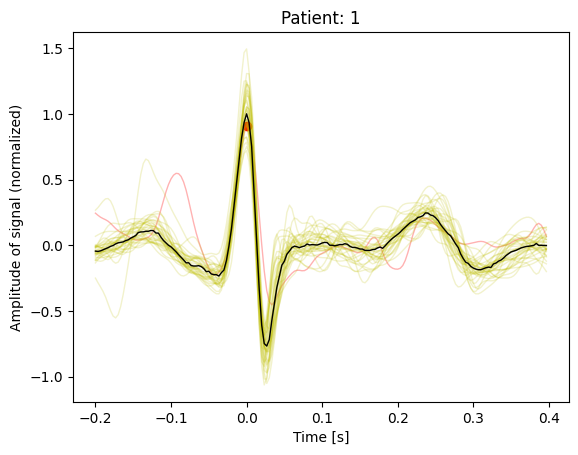

In [13]:
anom = check_R(rpeaks, templates_ts, templates)
print(anom)
for i in range(len(templates)):
    if i in anom :
        plt.plot(templates_ts, templates[i], 'r', alpha=0.3, lw=1)
        plt.plot(0, templates[i,r_id], 'or')
    else :
        plt.plot(templates_ts, templates[i], 'y', alpha=0.2, lw=1)
plt.plot(templates_ts, np.median(templates, axis=0), 'k', alpha=1, lw=1)

plt.title(f'Patient: {id}')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude of signal (normalized)')
plt.show()

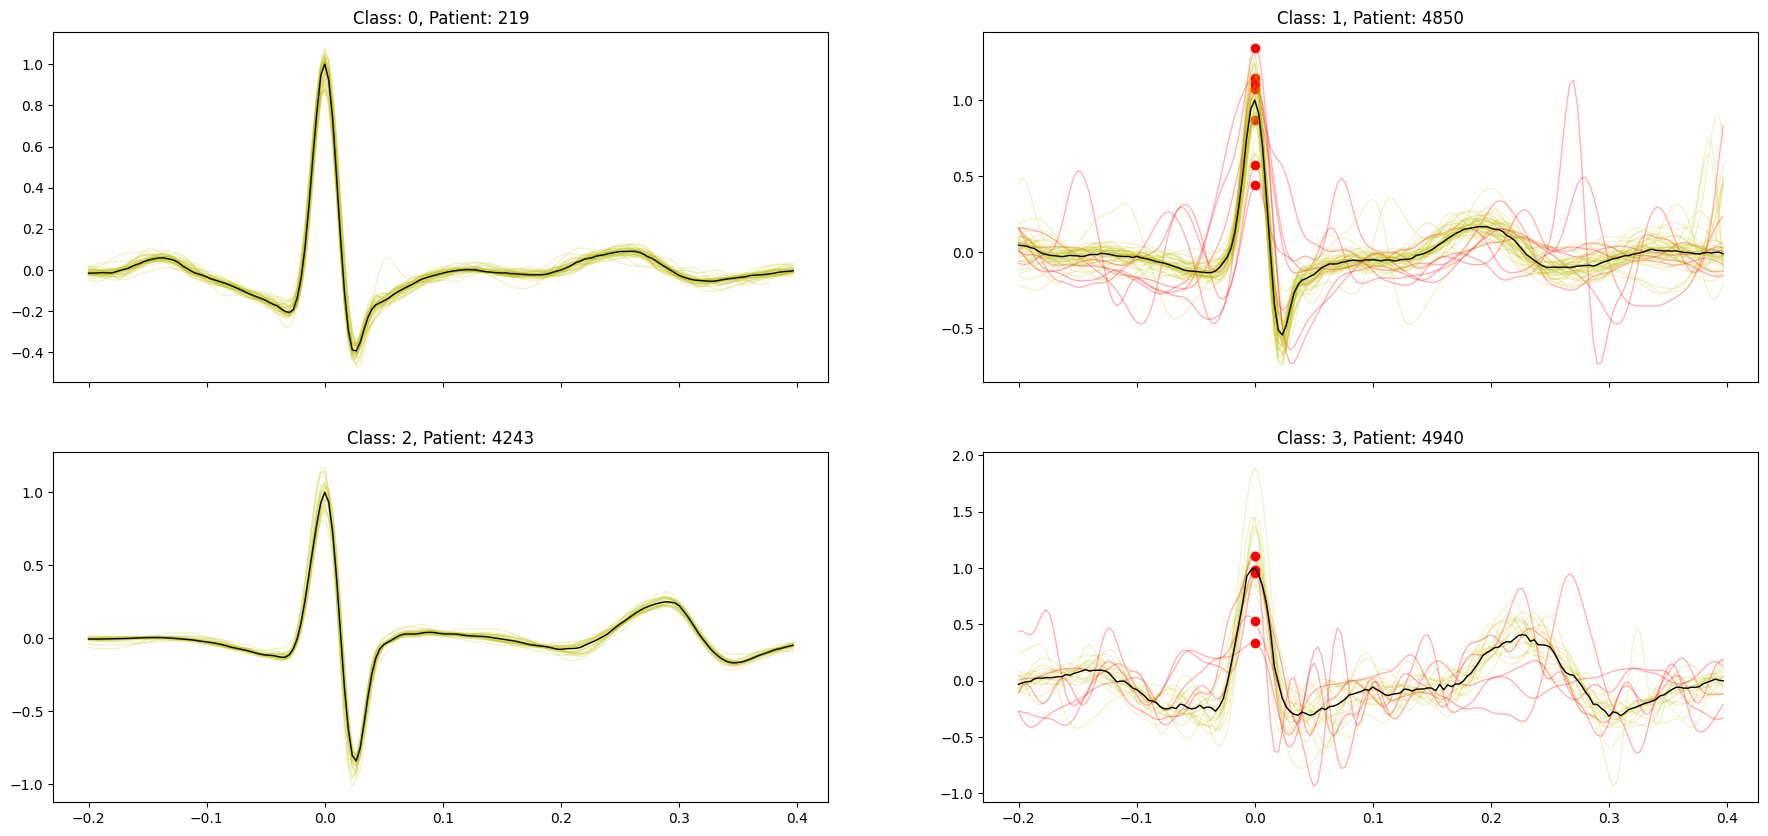

In [24]:
fig, axs = plt.subplots(2, 2, sharey=False, sharex=True, figsize=(22,10))
for i in range(4):
    id = np.random.choice(df_Y_train[df_Y_train["y"]==i].index) # random sample from class i
    signal = df_X_train.iloc[id,:].dropna()
    ts, signal, signal_flt, rpeaks, templates_ts, templates = pre_process(signal=signal, freq=freq)
    anom = check_R(rpeaks, templates_ts, templates)
    for k in range(len(templates)):
        if k in anom :
            axs[i//2,i%2].plot(templates_ts, templates[k], 'r', alpha=0.3, lw=1)
            axs[i//2,i%2].plot(0, templates[k,r_id], 'or')
        else :
            axs[i//2,i%2].plot(templates_ts, templates[k], 'y', alpha=0.2, lw=1)
    axs[i//2,i%2].plot(templates_ts, np.median(templates, axis=0), 'k', alpha=1, lw=1)
    axs[i//2,i%2].set_title(f'Class: {df_Y_train.loc[id,"y"]}, Patient: {id}')
plt.show()
